<a href="https://colab.research.google.com/github/nibinkjoseph/CarPRICE-PREDICTION/blob/master/Car_price_prediction_Nibin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv("/content/car_price_prediction.csv")

In [92]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


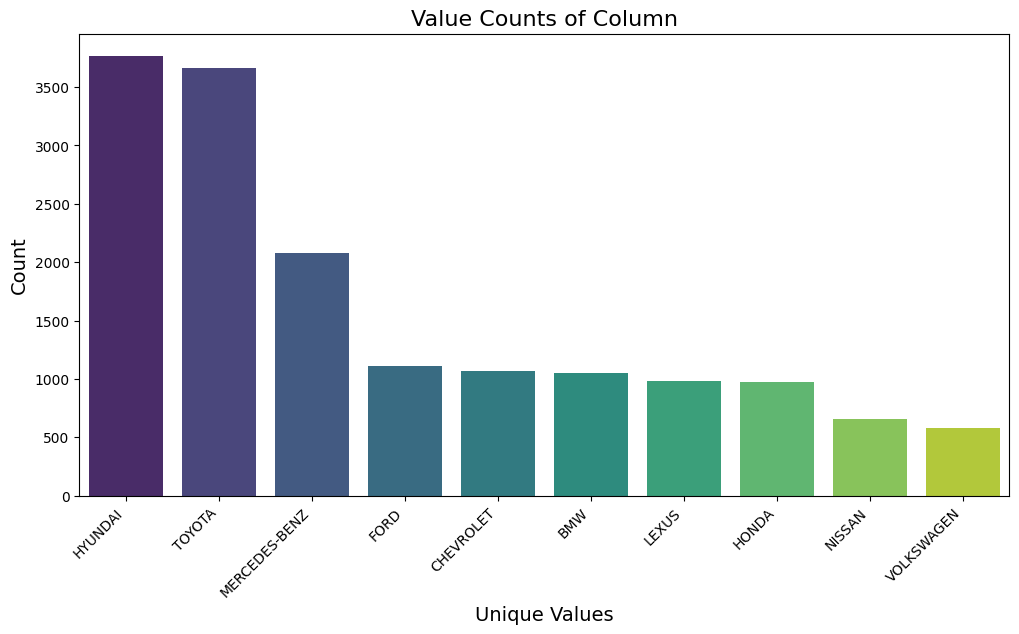

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'column_name' is the column for which you want to plot value counts


# Get value counts of the column
value_counts = df['Manufacturer'].value_counts().nlargest(10)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.title('Value Counts of Column', fontsize=16)
plt.xlabel('Unique Values', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

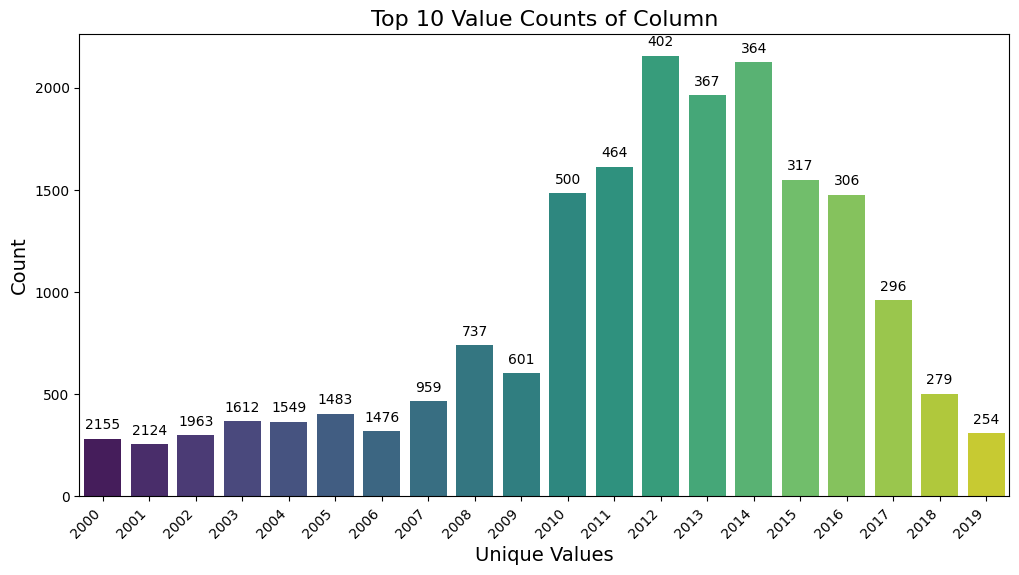

In [94]:

# Get value counts of the column and select the top 10
top_values = df['Prod. year'].value_counts().nlargest(20)

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')

# Display value counts above the bars
for p, label in zip(ax.patches, top_values.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Top 10 Value Counts of Column', fontsize=16)
plt.xlabel('Unique Values', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

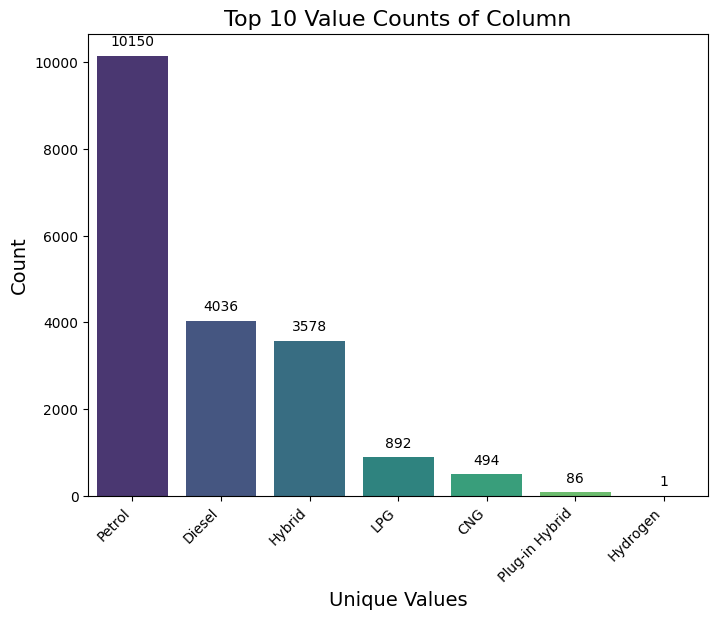

In [95]:

# Get value counts of the column and select the top 10
top_values = df['Fuel type'].value_counts().nlargest(20)

# Plotting with Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')

# Display value counts above the bars
for p, label in zip(ax.patches, top_values.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Top 10 Value Counts of Column', fontsize=16)
plt.xlabel('Unique Values', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

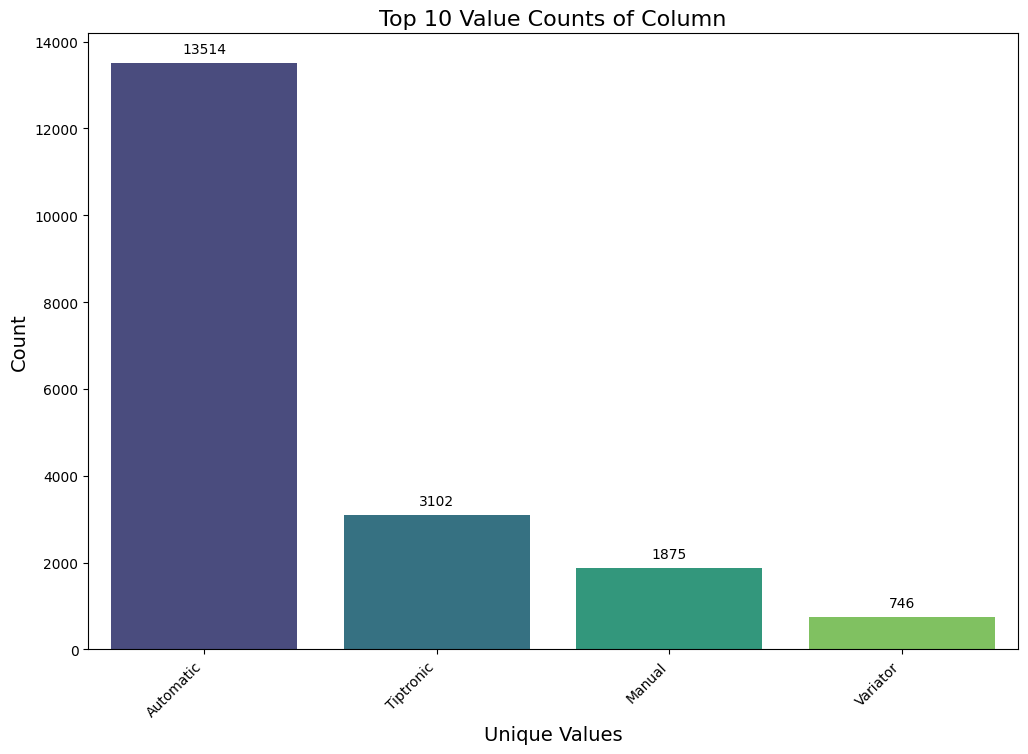

In [96]:

# Get value counts of the column and select the top 10
top_values = df['Gear box type'].value_counts().nlargest(20)

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')

# Display value counts above the bars
for p, label in zip(ax.patches, top_values.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Top 10 Value Counts of Column', fontsize=16)
plt.xlabel('Unique Values', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

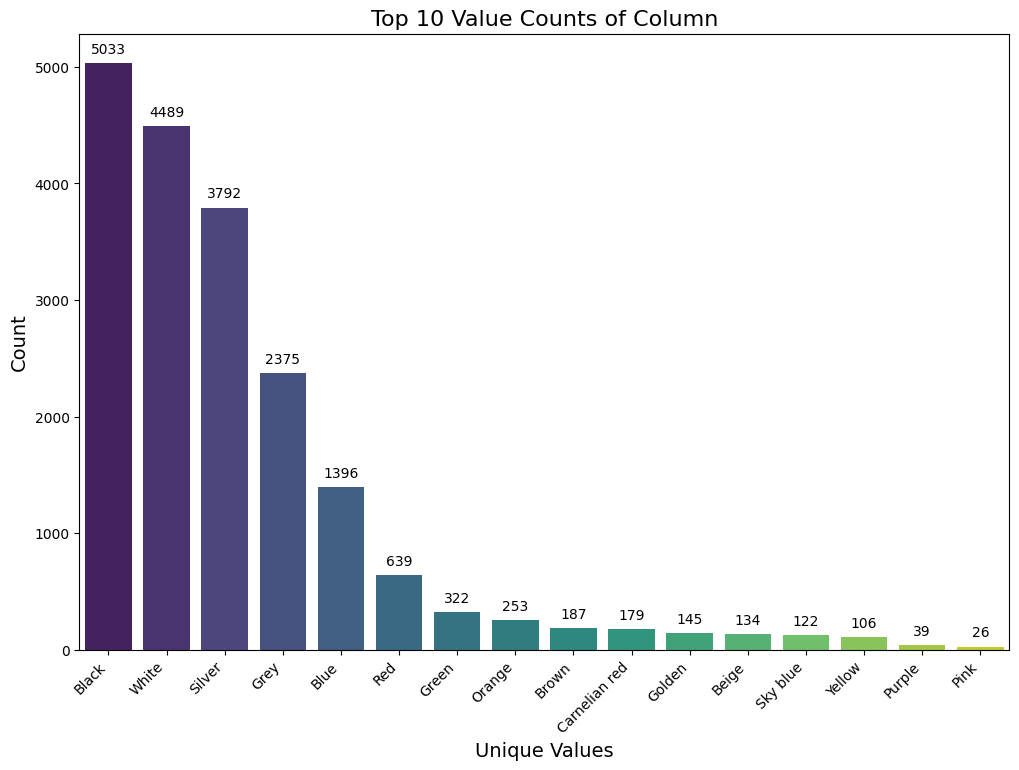

In [97]:
# Get value counts of the column and select the top 10
top_values = df['Color'].value_counts().nlargest(20)

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')

# Display value counts above the bars
for p, label in zip(ax.patches, top_values.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Top 10 Value Counts of Column', fontsize=16)
plt.xlabel('Unique Values', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

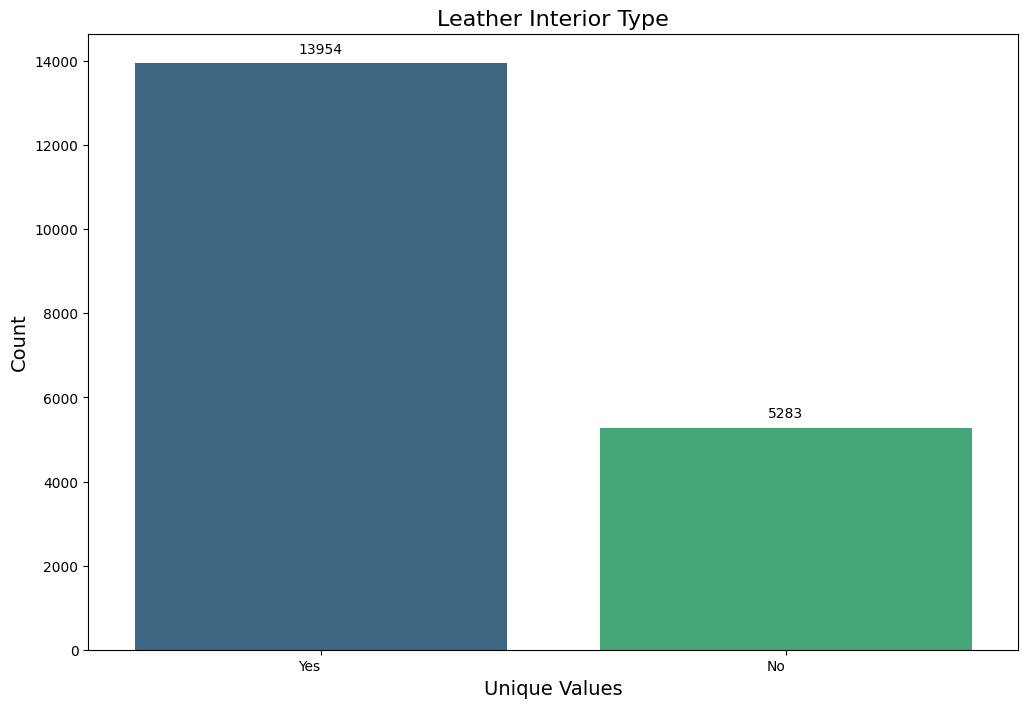

In [98]:
top_values = df['Leather interior'].value_counts().nlargest(20)

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')

# Display value counts above the bars
for p, label in zip(ax.patches, top_values.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Leather Interior Type', fontsize=16)
plt.xlabel('Unique Values', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.show()




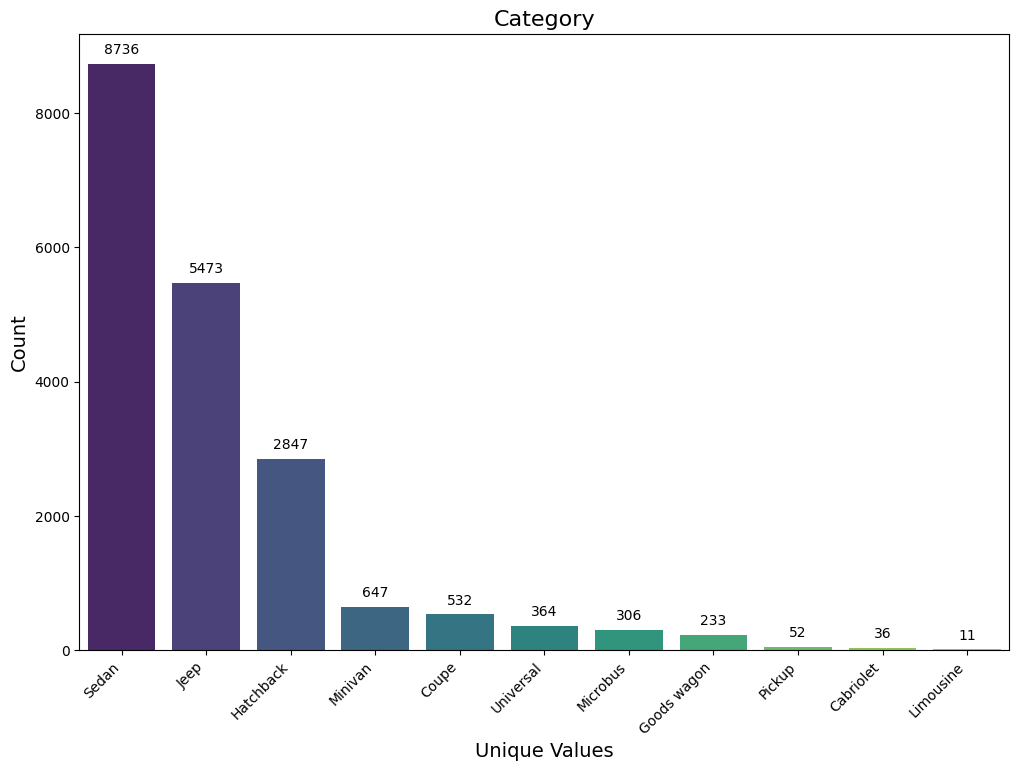

In [99]:
top_values = df['Category'].value_counts().nlargest(20)

# Plotting with Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')

# Display value counts above the bars
for p, label in zip(ax.patches, top_values.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Category', fontsize=16)
plt.xlabel('Unique Values', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation= 45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



In [100]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [101]:
df.shape

(19237, 18)

In [102]:
df['Price'].value_counts()


15681    280
470      274
14113    244
392      242
314      235
        ... 
42601      1
149        1
54349      1
54954      1
22075      1
Name: Price, Length: 2315, dtype: int64

In [103]:
for col in df.columns:
  print(col, ':', len(df[col].unique()), 'categories')

ID : 18924 categories
Price : 2315 categories
Levy : 559 categories
Manufacturer : 65 categories
Model : 1590 categories
Prod. year : 54 categories
Category : 11 categories
Leather interior : 2 categories
Fuel type : 7 categories
Engine volume : 107 categories
Mileage : 7687 categories
Cylinders : 13 categories
Gear box type : 4 categories
Drive wheels : 3 categories
Doors : 3 categories
Wheel : 2 categories
Color : 16 categories
Airbags : 17 categories


In [104]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [105]:
df.isnull().sum()

#No Null Values

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

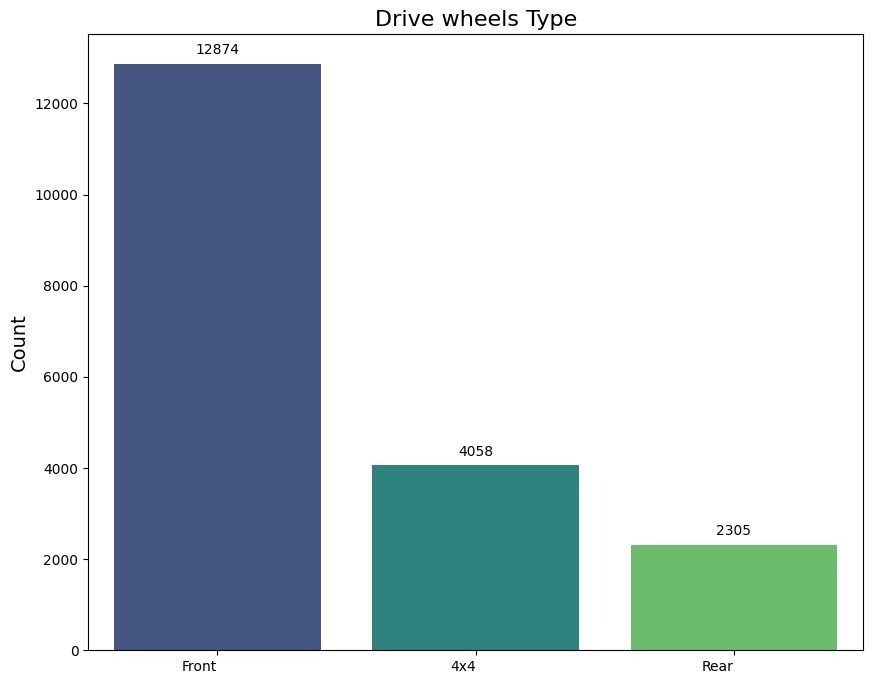

In [106]:
top_values = df['Drive wheels'].value_counts().nlargest(20)

# Plotting with Seaborn
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=top_values.index, y=top_values.values, palette='viridis')

# Display value counts above the bars
for p, label in zip(ax.patches, top_values.values):
    ax.annotate(label, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.title('Drive wheels Type', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, ha='right',fontsize=10)  # Rotate x-axis labels for better readability
plt.show()

In [107]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [108]:
df.duplicated().sum()

313

In [109]:
df = df.drop_duplicates()

In [110]:
df.shape

(18924, 18)

In [111]:
df.head(2)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8


In [112]:
#Convert dataype of objects to int
columns_to_convert = ['Prod. year','Airbags']

for column in columns_to_convert:
    df[column] = df[column].astype(int)

# Verify the changes
print(df.dtypes)

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object


<ipython-input-112-73b2cc0235de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)


In [113]:
#deleting km from Mileage column

df['Mileage'] = df['Mileage'].str.replace('km', '')
df['Mileage'] = df['Mileage'].astype(int)
df

<ipython-input-113-deab815dd4fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = df['Mileage'].str.replace('km', '')
<ipython-input-113-deab815dd4fc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'] = df['Mileage'].astype(int)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [114]:
df['Doors'].value_counts()

04-May    18032
02-Mar      768
>5          124
Name: Doors, dtype: int64

In [115]:
df['Doors'] = df['Doors'].str.replace('-May', '')
df['Doors'] = df['Doors'].str.replace('-Mar', '')
df['Doors'] = df['Doors'].str.replace('>', '')
df['Doors'] = df['Doors'].astype(int)
df

<ipython-input-115-8fcce151e32c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Doors'] = df['Doors'].str.replace('-May', '')
<ipython-input-115-8fcce151e32c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Doors'] = df['Doors'].str.replace('-Mar', '')


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,2,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,4,Left wheel,Black,4


In [116]:
df['Doors'].value_counts()

4    18032
2      768
5      124
Name: Doors, dtype: int64

In [117]:
df.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage               int64
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                 int64
Wheel                object
Color                object
Airbags               int64
dtype: object

In [118]:
df.shape

(18924, 18)

In [119]:
# Drop rows where 'Door' column has value 5
df = df[df['Doors'] != 5]



In [120]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4


In [121]:
df.shape

(18800, 18)

In [122]:
#Finding outliers

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1


outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[~outliers]


In [123]:
outliers.value_counts()

False    10381
True      8419
dtype: int64

In [124]:
df.shape

(10381, 18)

Ordinal encoding is a technique used in machine learning and data preprocessing to convert categorical variables with ordered relationships into numerical representations. It is suitable for variables where the categories have a clear order or ranking.

In ordinal encoding:

1.Each unique category is assigned a unique integer.

2.The integers are assigned based on the order or ranking of the categories.

In [125]:
from sklearn.preprocessing import OrdinalEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[categorical_columns])
df[categorical_columns] = encoded_data.astype(int)
df.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,0,16,277,2006,3,0,4,11,200000,4.0,3,1,4,1,1,2
3,45769185,3607,299,12,268,2011,4,1,2,34,168966,4.0,0,0,4,0,14,0
4,45809263,11726,174,16,277,2014,3,1,4,11,91901,4.0,0,1,4,0,12,4
5,45802912,39493,311,17,553,2016,4,1,1,25,160931,4.0,0,1,4,0,14,4
6,45656768,1803,272,42,504,2010,3,1,2,21,258909,4.0,0,1,4,0,14,12


In [126]:
df.dtypes

ID                    int64
Price                 int64
Levy                  int64
Manufacturer          int64
Model                 int64
Prod. year            int64
Category              int64
Leather interior      int64
Fuel type             int64
Engine volume         int64
Mileage               int64
Cylinders           float64
Gear box type         int64
Drive wheels          int64
Doors                 int64
Wheel                 int64
Color                 int64
Airbags               int64
dtype: object

In [127]:
df['Cylinders'] = df['Cylinders'].astype(int)

In [128]:
df.dtypes

ID                  int64
Price               int64
Levy                int64
Manufacturer        int64
Model               int64
Prod. year          int64
Category            int64
Leather interior    int64
Fuel type           int64
Engine volume       int64
Mileage             int64
Cylinders           int64
Gear box type       int64
Drive wheels        int64
Doors               int64
Wheel               int64
Color               int64
Airbags             int64
dtype: object

In [129]:
df['Cylinders'].head()

2    4
3    4
4    4
5    4
6    4
Name: Cylinders, dtype: int64

In [131]:
df.head()


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,0,16,277,2006,3,0,4,11,200000,4,3,1,4,1,1,2
3,45769185,3607,299,12,268,2011,4,1,2,34,168966,4,0,0,4,0,14,0
4,45809263,11726,174,16,277,2014,3,1,4,11,91901,4,0,1,4,0,12,4
5,45802912,39493,311,17,553,2016,4,1,1,25,160931,4,0,1,4,0,14,4
6,45656768,1803,272,42,504,2010,3,1,2,21,258909,4,0,1,4,0,14,12


In [132]:
df['Levy']=df['Levy'].replace('-','0')

In [133]:
df.dtypes

ID                  int64
Price               int64
Levy                int64
Manufacturer        int64
Model               int64
Prod. year          int64
Category            int64
Leather interior    int64
Fuel type           int64
Engine volume       int64
Mileage             int64
Cylinders           int64
Gear box type       int64
Drive wheels        int64
Doors               int64
Wheel               int64
Color               int64
Airbags             int64
dtype: object

In [137]:
df['Engine volume'].value_counts


<bound method IndexOpsMixin.value_counts of 2        11
3        34
4        11
5        25
6        21
         ..
19230    21
19233    32
19234    25
19235    25
19236    32
Name: Engine volume, Length: 10381, dtype: int64>

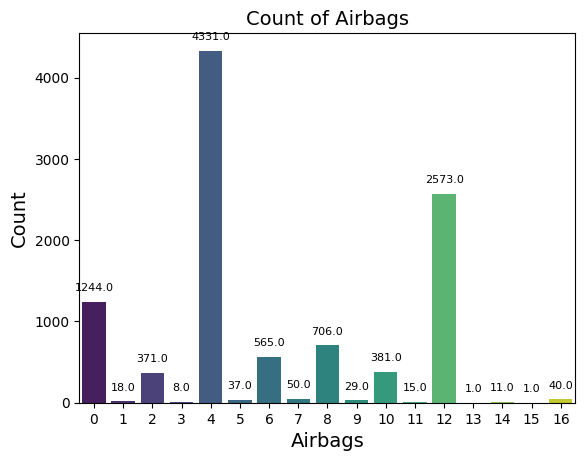

In [140]:

ax = sns.countplot(x='Airbags', data=df, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Count of Airbags', fontsize=14)
plt.xlabel('Airbags', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [148]:
#Splitting to training and testing


X = df.drop('Price', axis=1)
y = df['Price']

from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=5)

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [152]:
y_prediction = model.predict(x_test)

In [153]:
model.score(x_test,y_test)

0.2683784550046121

In [159]:
#Multiple Models

algorithm = ['LinearRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingRegressor','SVR']
R2=[]
RMSE = []

In [160]:
def models(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    r2 = r2_score(y_test,pre)
    rmse = np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score = model.score(x_test,y_test)
    print(f'The Score of Model is :{score}')

In [163]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()
model5 = SVR()

In [164]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)

The Score of Model is :0.2683784550046121
The Score of Model is :0.6290450763082108
The Score of Model is :0.8120046688886637
The Score of Model is :0.718292039597612
The Score of Model is :-0.014960750458053784


In [165]:
df = pd.DataFrame({'Algorithm':algorithm, 'R2_score': R2, 'RMSE':RMSE})
df

,Algorithm,R2_score,RMSE
0,LinearRegression,0.268378,9675.130739
1,DecisionTreeClassifier,0.629045,6889.285283
2,RandomForestClassifier,0.812005,4904.414085
3,GradientBoostingRegressor,0.718292,6003.619491
4,SVR,-0.014961,11395.626939


Evalution


In [154]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from math import sqrt

In [155]:
y_pred = model.predict(x_test)

In [156]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 93608154.82201745


In [157]:
rmse = sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 9675.130739272594


Saving the Model

In [158]:
import pickle
filename = 'trained_model.sav'
pickle.dump(model,open(filename,'wb'))